In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitudes and longtitudes combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longtitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longtitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [1]:
# Create an empty list to hold the weather date.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i,  city in enumerate(cities):

    # Group cities in sets of  for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve.data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data. 
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lon": city_lon,
                          "Max Temp": city_max_temp,
                          "HUmidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------


NameError: name 'cities' is not defined

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lon,Max Temp,HUmidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,30.69,42,100,3.47,RU,2021-04-21 15:02:07
1,Ilulissat,69.2167,-51.1000,21.20,58,1,6.91,GL,2021-04-21 15:02:08
2,Mataura,-46.1927,168.8643,48.00,97,100,4.00,NZ,2021-04-21 15:02:08
3,Kapaa,22.0752,-159.3190,68.00,88,90,4.61,US,2021-04-21 15:02:09
4,Nouadhibou,20.9310,-17.0347,75.20,60,4,18.41,MR,2021-04-21 15:02:09
5,Vaini,-21.2000,-175.2000,71.60,100,20,2.30,TO,2021-04-21 15:02:10
6,Upernavik,72.7868,-56.1549,15.64,69,66,5.19,GL,2021-04-21 15:02:10
7,Hasaki,35.7333,140.8333,55.40,71,0,4.61,JP,2021-04-21 15:02:11
8,Nikolskoye,59.7035,30.7861,37.40,87,75,6.71,RU,2021-04-21 15:02:11
9,Rikitea,-23.1203,-134.9692,77.56,73,71,7.76,PF,2021-04-21 15:02:12


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lon", "Max Temp", "HUmidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lon,Max Temp,HUmidity,Cloudiness,Wind Speed
0,Provideniya,RU,2021-04-21 15:02:07,64.3833,-173.3000,30.69,42,100,3.47
1,Ilulissat,GL,2021-04-21 15:02:08,69.2167,-51.1000,21.20,58,1,6.91
2,Mataura,NZ,2021-04-21 15:02:08,-46.1927,168.8643,48.00,97,100,4.00
3,Kapaa,US,2021-04-21 15:02:09,22.0752,-159.3190,68.00,88,90,4.61
4,Nouadhibou,MR,2021-04-21 15:02:09,20.9310,-17.0347,75.20,60,4,18.41
5,Vaini,TO,2021-04-21 15:02:10,-21.2000,-175.2000,71.60,100,20,2.30
6,Upernavik,GL,2021-04-21 15:02:10,72.7868,-56.1549,15.64,69,66,5.19
7,Hasaki,JP,2021-04-21 15:02:11,35.7333,140.8333,55.40,71,0,4.61
8,Nikolskoye,RU,2021-04-21 15:02:11,59.7035,30.7861,37.40,87,75,6.71
9,Rikitea,PF,2021-04-21 15:02:12,-23.1203,-134.9692,77.56,73,71,7.76


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["HUmidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

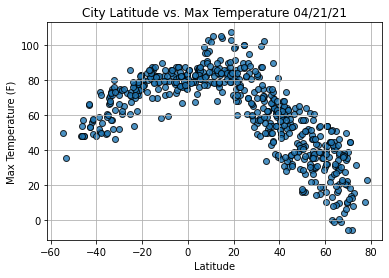

In [13]:
# Import time module
import time

# Build the scatter ploe for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# SAve the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

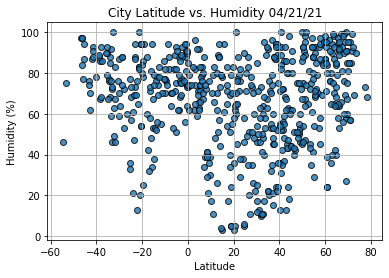

In [14]:
# Build the scatter ploe for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# SAve the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

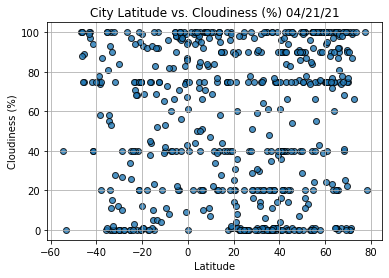

In [15]:
# Build the scatter ploe for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# SAve the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

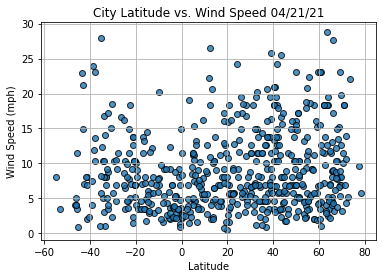

In [16]:
# Build the scatter ploe for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# SAve the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on the hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line. 
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-04-21 15:01:39
Lat                         -54.8
Lon                         -68.3
Max Temp                       50
HUmidity                       46
Cloudiness                     40
Wind Speed                   8.05
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
572     True
573     True
574     True
575    False
576     True
Name: Lat, Length: 577, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lon,Max Temp,HUmidity,Cloudiness,Wind Speed
0,Provideniya,RU,2021-04-21 15:02:07,64.3833,-173.3000,30.69,42,100,3.47
1,Ilulissat,GL,2021-04-21 15:02:08,69.2167,-51.1000,21.20,58,1,6.91
3,Kapaa,US,2021-04-21 15:02:09,22.0752,-159.3190,68.00,88,90,4.61
4,Nouadhibou,MR,2021-04-21 15:02:09,20.9310,-17.0347,75.20,60,4,18.41
6,Upernavik,GL,2021-04-21 15:02:10,72.7868,-56.1549,15.64,69,66,5.19


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

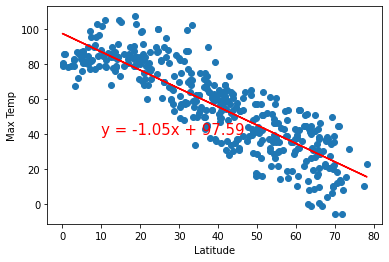

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

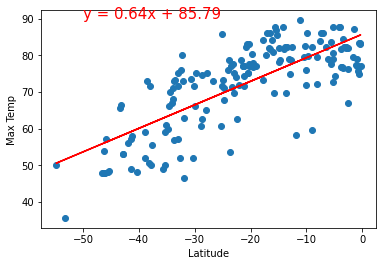

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50, 90))

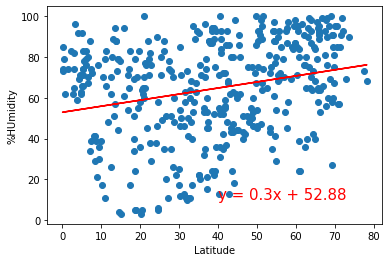

In [36]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["HUmidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for %HUmidity', '%HUmidity',(40,10))

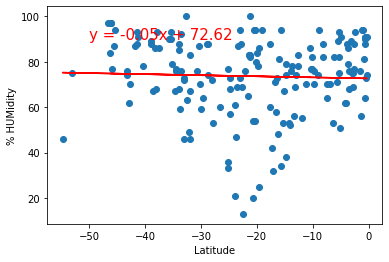

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["HUmidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for %HUmidity', '% HUMidity',(-50, 90))

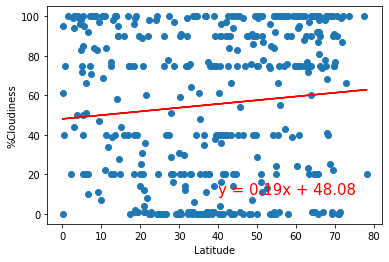

In [38]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '%Cloudiness',(40,10))

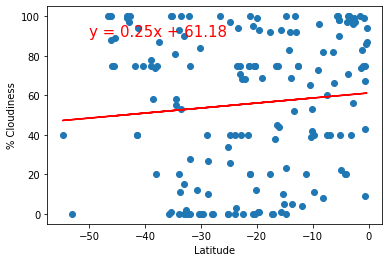

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,90))

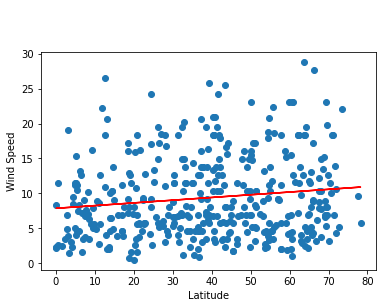

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))

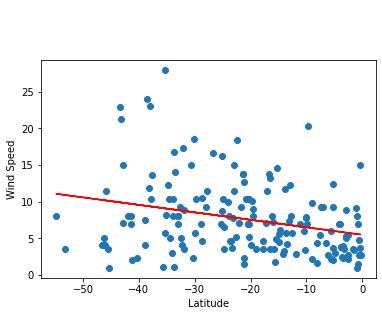

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for Wind Speed', 'Wind Speed',(-50,35))